In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class KMeansClustering():
    def __init__(self, x, num_clusters):
        self.K = num_clusters
        self.plot_figure = True
        self.max_iterations = 100
        self.num_examples, self.num_features = x.shape
    
    def initialize_random_centroids(self, x):
        centroids = np.zeros((self.K, self.num_features))
        
        for k in range(self.K):
            centroid = x[np.random.choice(range(self.num_examples))]
            centroids[k] = centroid
            
        return centroids
    
    def create_clusters(self, x, centroids):
        clusters = [[] for _ in range(self.K)]
        
        for point_idx, point in enumerate(x):
            closest_centroid = np.argmin(np.sqrt(np.sum((point - centroids) ** 2,  axis = 1)))
            clusters[closest_centroid].append(point_idx)
        return clusters
    
    def calculate_new_centroids(self, clusters, x):
        centroids = np.zeros((self.K, self.num_features))
        
        for idx, cluster in enumerate(clusters):
            new_centroid = np.mean(x[cluster], axis = 0)
            centroids[idx] = new_centroid
        return centroids
    
    def predict_cluster(self, clusters, x):
        y_pred = np.zeros(self.num_examples)
        
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                y_pred[sample_idx] = cluster_idx
        return y_pred
    
    def plot_fig(self, x, y):
        plt.scatter(x[:, 0], x[:, 1], c=y, s = 40, cmap=plt.cm.Spectral)
        plt.show()
    
    def fit(self, x):
        centroids = self.initialize_random_centroids(x)
        
        for it in range(self.max_iterations):
            clusters = self.create_clusters(x, centroids)
            
            previous_centroids = centroids
            centroids = self.calculate_new_centroids(clusters, x)
            
            diff = centroids - previous_centroids
            
            if not diff.any():
                print('kmeans has converged, criterion satisfied')
                break
                
        y_pred = self.predict_cluster(clusters, x)
    
        if self.plot_figure:
            self.plot_fig(x, y_pred)
        return y_pred

In [3]:
x = np.random.randn(100, 2)

In [4]:
num_clusters = 3

In [5]:
kmeans = KMeansClustering(x, num_clusters)

kmeans has converged, criterion satisfied


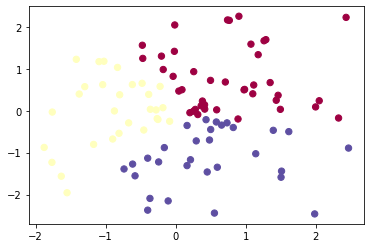

In [6]:
y_pred = kmeans.fit(x)

In [7]:
y_pred

array([0., 0., 0., 2., 2., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 2., 1.,
       2., 1., 1., 2., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 2., 0., 2.,
       1., 0., 2., 1., 0., 1., 0., 0., 1., 2., 1., 2., 0., 2., 0., 0., 2.,
       1., 0., 0., 1., 0., 2., 2., 2., 2., 0., 0., 1., 1., 2., 2., 2., 1.,
       1., 1., 1., 1., 2., 2., 0., 2., 0., 2., 0., 0., 2., 0., 2., 0., 0.,
       1., 2., 2., 0., 1., 0., 1., 0., 2., 1., 2., 0., 0., 1., 1.])

Since kmeans clustering is an unsupervised learning technique, we do not need to split our data into separate test and train sets because the algorithm is not supervised as it doesnt rely on labels to learn. However, we still need to check and evaluate the quality of clustering results to determine if they are useful for the intended purpose.